In [1]:
%cd ../

In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.tardb as tardb
import htfa_torch.utils as utils

from ordered_set import OrderedSet
import itertools
import torch

In [3]:
%matplotlib inline

In [4]:
PREFIX = 'avfp_memory_110'

In [5]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [6]:
affvids_db = tardb.FmriTarDataset('data/avfp_memory_mini.tar')

In [7]:
dtfa = DTFA.DeepTFA(affvids_db, num_factors=100, embedding_dim=2)

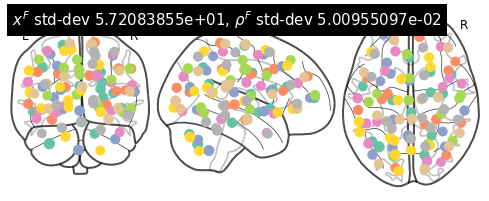

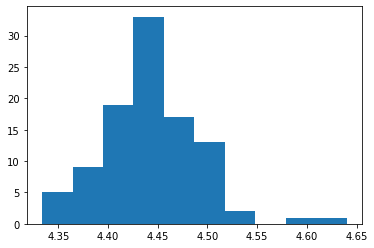

(<nilearn.plotting.displays.OrthoProjector at 0x7fcae30f2df0>,
 tensor([[ 22.7167, -53.6097,  23.5313],
         [ 21.3226,  13.3966,  17.6763],
         [-49.5932,  -1.7929,  -6.3694],
         [-32.4893, -65.4800, -40.1911],
         [-18.3203, -16.2608,  63.7130],
         [-39.6857, -59.9281,  40.5782],
         [ 43.5103,  10.5285,  -2.4946],
         [ 15.2515, -74.2273, -29.4934],
         [ 34.8172,  -9.5777,  13.1366],
         [ -0.7767,  28.4325,  20.5837],
         [ 21.7221,  -8.1795,  35.0465],
         [ 24.1767,  57.2205,   8.5469],
         [  1.3096, -29.4180, -17.3938],
         [-15.3207, -87.6291,  19.2803],
         [-23.2916,  -9.6490,  33.4934],
         [ 15.3322, -41.8600,  66.5244],
         [ 27.7300, -36.5380,   0.7989],
         [-54.5692, -26.7300,   1.7023],
         [-29.6226, -15.1070, -14.7421],
         [ 53.6859, -39.9418,  38.8484],
         [ 38.2675, -74.2161,  15.1114],
         [-44.8060,   7.7126,  35.2493],
         [  9.8970,  50.1059,  31.3

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

144

In [10]:
dtfa.num_voxels

175987

In [11]:
dtfa.tasks()

['Heights_b_3.mov',
 'Heights_b_4.mp4',
 'Spiders_b_4.m4v',
 'Spiders_b_1.m4v',
 'Heights_b_2.m4v',
 'Heights_b_1.mp4',
 'Social_b_2.mov',
 'Social_a_2.m4v',
 'Social_a_4.mp4',
 'Social_b_4.mov',
 'Spiders_b_3.mov',
 'Spiders_b_2.mp4',
 'Spiders_a_1.m4v',
 'Social_b_3.mp4',
 'Spiders_a_4.mov',
 'Heights_a_1.mp4',
 'Spiders_a_3.m4v',
 'Heights_a_2.m4v',
 'Heights_a_3.mp4',
 'Social_a_3.mp4',
 'Social_b_1.mp4',
 'Social_a_1.mp4',
 'Heights_a_4.mp4',
 'Spiders_a_2.mp4']

In [12]:
dtfa.subjects()

[150, 158, 159, 161, 166, 169]

In [13]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=80, use_cuda=True, checkpoint_steps=100, patience=500,
                    blocks_filter=affvids_db.inference_filter(training=True), l_p=1, l_s=1, l_i=0)

10/25/2021 18:08:16 [Epoch 1] (47258ms) ELBO -3.73619537e+10 = log-likelihood -3.73597104e+10 - KL from prior 2.23735898e+06, P weight penalty 2.53881088e+03, S weight penalty 2.73929915e+03, I weight penalty 2.20441828e+03
10/25/2021 18:08:16 Saving checkpoint...
10/25/2021 18:08:23 [Epoch 2] (6890ms) ELBO -3.63413237e+10 = log-likelihood -3.63391279e+10 - KL from prior 2.19050920e+06, P weight penalty 2.43699352e+03, S weight penalty 2.49623129e+03, I weight penalty 2.12201642e+03
10/25/2021 18:08:30 [Epoch 3] (6805ms) ELBO -3.56919707e+10 = log-likelihood -3.56898252e+10 - KL from prior 2.14041797e+06, P weight penalty 2.11212588e+03, S weight penalty 2.07895419e+03, I weight penalty 2.04319563e+03
10/25/2021 18:08:37 [Epoch 4] (6708ms) ELBO -3.52142695e+10 = log-likelihood -3.52121695e+10 - KL from prior 2.09634093e+06, P weight penalty 1.72391704e+03, S weight penalty 1.83394071e+03, I weight penalty 1.96948806e+03
10/25/2021 18:08:43 [Epoch 5] (6782ms) ELBO -3.48765649e+10 = log-

10/25/2021 18:12:29 [Epoch 38] (6982ms) ELBO -2.87716069e+10 = log-likelihood -2.87709846e+10 - KL from prior 6.22263796e+05, P weight penalty 3.64311378e+02, S weight penalty 5.53498168e+02, I weight penalty 1.24815876e+03
10/25/2021 18:12:36 [Epoch 39] (6942ms) ELBO -2.86993369e+10 = log-likelihood -2.86987082e+10 - KL from prior 6.28480589e+05, P weight penalty 3.74325688e+02, S weight penalty 5.57827508e+02, I weight penalty 1.26332734e+03
10/25/2021 18:12:43 [Epoch 40] (6840ms) ELBO -2.86254902e+10 = log-likelihood -2.86248586e+10 - KL from prior 6.31797439e+05, P weight penalty 3.96978168e+02, S weight penalty 5.04978559e+02, I weight penalty 1.27871294e+03
10/25/2021 18:12:50 [Epoch 41] (6858ms) ELBO -2.85593954e+10 = log-likelihood -2.85587595e+10 - KL from prior 6.35807673e+05, P weight penalty 3.85318386e+02, S weight penalty 5.35837826e+02, I weight penalty 1.29117416e+03
10/25/2021 18:12:57 [Epoch 42] (6797ms) ELBO -2.84950095e+10 = log-likelihood -2.84943667e+10 - KL from 

10/25/2021 18:16:46 [Epoch 75] (6827ms) ELBO -2.75003384e+10 = log-likelihood -2.74995332e+10 - KL from prior 8.05084724e+05, P weight penalty 1.93441774e+02, S weight penalty 3.76257413e+02, I weight penalty 1.50834042e+03
10/25/2021 18:16:53 [Epoch 76] (6924ms) ELBO -2.74833823e+10 = log-likelihood -2.74825732e+10 - KL from prior 8.08917157e+05, P weight penalty 2.32941638e+02, S weight penalty 3.77666271e+02, I weight penalty 1.50962316e+03
10/25/2021 18:17:00 [Epoch 77] (6821ms) ELBO -2.74752037e+10 = log-likelihood -2.74743917e+10 - KL from prior 8.12022335e+05, P weight penalty 2.14628935e+02, S weight penalty 3.51993241e+02, I weight penalty 1.51161230e+03
10/25/2021 18:17:07 [Epoch 78] (6864ms) ELBO -2.74576146e+10 = log-likelihood -2.74567978e+10 - KL from prior 8.17055958e+05, P weight penalty 2.25796839e+02, S weight penalty 2.86836558e+02, I weight penalty 1.51068107e+03
10/25/2021 18:17:14 [Epoch 79] (7045ms) ELBO -2.74467969e+10 = log-likelihood -2.74459777e+10 - KL from 

10/25/2021 18:21:02 [Epoch 112] (6869ms) ELBO -2.71198986e+10 = log-likelihood -2.71189849e+10 - KL from prior 9.13804567e+05, P weight penalty 1.09102857e+02, S weight penalty 2.81513277e+02, I weight penalty 1.51636594e+03
10/25/2021 18:21:09 [Epoch 113] (6850ms) ELBO -2.71153502e+10 = log-likelihood -2.71144345e+10 - KL from prior 9.15435536e+05, P weight penalty 8.01359997e+01, S weight penalty 2.68364989e+02, I weight penalty 1.51648063e+03
10/25/2021 18:21:16 [Epoch 114] (6747ms) ELBO -2.71039947e+10 = log-likelihood -2.71030758e+10 - KL from prior 9.18708259e+05, P weight penalty 9.16286184e+01, S weight penalty 2.89381381e+02, I weight penalty 1.51574382e+03
10/25/2021 18:21:22 [Epoch 115] (6789ms) ELBO -2.70981465e+10 = log-likelihood -2.70972269e+10 - KL from prior 9.19732462e+05, P weight penalty 9.35189952e+01, S weight penalty 2.65978599e+02, I weight penalty 1.51460122e+03
10/25/2021 18:21:29 [Epoch 116] (7036ms) ELBO -2.70875528e+10 = log-likelihood -2.70866305e+10 - KL 

10/25/2021 18:25:16 [Epoch 149] (6768ms) ELBO -2.69342538e+10 = log-likelihood -2.69332636e+10 - KL from prior 9.90060010e+05, P weight penalty 6.33437947e+01, S weight penalty 2.39224241e+02, I weight penalty 1.51756699e+03
10/25/2021 18:25:23 [Epoch 150] (6760ms) ELBO -2.69272717e+10 = log-likelihood -2.69262790e+10 - KL from prior 9.92780831e+05, P weight penalty 5.26651164e+01, S weight penalty 2.22624526e+02, I weight penalty 1.51681209e+03
10/25/2021 18:25:30 [Epoch 151] (6820ms) ELBO -2.69273219e+10 = log-likelihood -2.69263287e+10 - KL from prior 9.93317344e+05, P weight penalty 6.75385390e+01, S weight penalty 2.18274136e+02, I weight penalty 1.51730654e+03
10/25/2021 18:25:36 [Epoch 152] (6790ms) ELBO -2.69228302e+10 = log-likelihood -2.69218348e+10 - KL from prior 9.95453690e+05, P weight penalty 4.25933701e+01, S weight penalty 2.44614108e+02, I weight penalty 1.51734461e+03
10/25/2021 18:25:43 [Epoch 153] (6794ms) ELBO -2.69216235e+10 = log-likelihood -2.69206261e+10 - KL 

10/25/2021 18:29:30 [Epoch 186] (6896ms) ELBO -2.68358309e+10 = log-likelihood -2.68347797e+10 - KL from prior 1.05133891e+06, P weight penalty 7.06665123e+01, S weight penalty 2.06189934e+02, I weight penalty 1.53230495e+03
10/25/2021 18:29:37 [Epoch 187] (6943ms) ELBO -2.68345053e+10 = log-likelihood -2.68334527e+10 - KL from prior 1.05246350e+06, P weight penalty 5.01025444e+01, S weight penalty 2.31761995e+02, I weight penalty 1.53206758e+03
10/25/2021 18:29:44 [Epoch 188] (6792ms) ELBO -2.68280769e+10 = log-likelihood -2.68270234e+10 - KL from prior 1.05369736e+06, P weight penalty 5.66867298e+01, S weight penalty 2.18342974e+02, I weight penalty 1.53155461e+03
10/25/2021 18:29:51 [Epoch 189] (6945ms) ELBO -2.68268479e+10 = log-likelihood -2.68257927e+10 - KL from prior 1.05510022e+06, P weight penalty 3.35501194e+01, S weight penalty 2.04018198e+02, I weight penalty 1.53194003e+03
10/25/2021 18:29:58 [Epoch 190] (7026ms) ELBO -2.68219792e+10 = log-likelihood -2.68209211e+10 - KL 

10/25/2021 18:33:46 [Epoch 223] (6933ms) ELBO -2.67756304e+10 = log-likelihood -2.67745307e+10 - KL from prior 1.09982931e+06, P weight penalty 2.72710036e+01, S weight penalty 2.16363149e+02, I weight penalty 1.53686032e+03
10/25/2021 18:33:54 [Epoch 224] (7089ms) ELBO -2.67683746e+10 = log-likelihood -2.67672733e+10 - KL from prior 1.10131475e+06, P weight penalty 4.77443584e+01, S weight penalty 2.21453294e+02, I weight penalty 1.53739697e+03
10/25/2021 18:34:00 [Epoch 225] (6806ms) ELBO -2.67684079e+10 = log-likelihood -2.67673066e+10 - KL from prior 1.10137909e+06, P weight penalty 5.46892620e+01, S weight penalty 2.12659023e+02, I weight penalty 1.53796551e+03
10/25/2021 18:34:07 [Epoch 226] (6769ms) ELBO -2.67610619e+10 = log-likelihood -2.67599587e+10 - KL from prior 1.10316865e+06, P weight penalty 4.63213318e+01, S weight penalty 2.27995276e+02, I weight penalty 1.53616741e+03
10/25/2021 18:34:14 [Epoch 227] (6756ms) ELBO -2.67626513e+10 = log-likelihood -2.67615473e+10 - KL 

10/25/2021 18:38:01 [Epoch 260] (6856ms) ELBO -2.67196258e+10 = log-likelihood -2.67184860e+10 - KL from prior 1.13987071e+06, P weight penalty 3.41105012e+01, S weight penalty 3.32644733e+02, I weight penalty 1.51399635e+03
10/25/2021 18:38:08 [Epoch 261] (6914ms) ELBO -2.67198210e+10 = log-likelihood -2.67186814e+10 - KL from prior 1.13946412e+06, P weight penalty 5.29839474e+01, S weight penalty 3.24040413e+02, I weight penalty 1.51344414e+03
10/25/2021 18:38:15 [Epoch 262] (6965ms) ELBO -2.67169797e+10 = log-likelihood -2.67158380e+10 - KL from prior 1.14189714e+06, P weight penalty 5.07793349e+01, S weight penalty 3.29533177e+02, I weight penalty 1.51151790e+03
10/25/2021 18:38:22 [Epoch 263] (6847ms) ELBO -2.67192919e+10 = log-likelihood -2.67181490e+10 - KL from prior 1.14280088e+06, P weight penalty 6.09513017e+01, S weight penalty 3.47226108e+02, I weight penalty 1.51223982e+03
10/25/2021 18:38:28 [Epoch 264] (6971ms) ELBO -2.67159405e+10 = log-likelihood -2.67147964e+10 - KL 

10/25/2021 18:42:19 [Epoch 297] (7110ms) ELBO -2.66836097e+10 = log-likelihood -2.66824353e+10 - KL from prior 1.17411472e+06, P weight penalty 4.08349810e+01, S weight penalty 4.67251539e+02, I weight penalty 1.45451845e+03
10/25/2021 18:42:26 [Epoch 298] (7039ms) ELBO -2.66812208e+10 = log-likelihood -2.66800462e+10 - KL from prior 1.17470017e+06, P weight penalty 3.14648921e+01, S weight penalty 4.83173541e+02, I weight penalty 1.45350741e+03
10/25/2021 18:42:33 [Epoch 299] (6988ms) ELBO -2.66834965e+10 = log-likelihood -2.66823212e+10 - KL from prior 1.17529282e+06, P weight penalty 5.85170838e+01, S weight penalty 5.13844615e+02, I weight penalty 1.45425026e+03
10/25/2021 18:42:40 [Epoch 300] (7089ms) ELBO -2.66824321e+10 = log-likelihood -2.66812551e+10 - KL from prior 1.17714136e+06, P weight penalty 1.72113612e+01, S weight penalty 4.69631888e+02, I weight penalty 1.45355224e+03
10/25/2021 18:42:46 [Epoch 301] (6797ms) ELBO -2.66871759e+10 = log-likelihood -2.66859990e+10 - KL 

10/25/2021 18:46:34 [Epoch 334] (7099ms) ELBO -2.66496384e+10 = log-likelihood -2.66484330e+10 - KL from prior 1.20522591e+06, P weight penalty 4.64056064e+01, S weight penalty 5.94955804e+02, I weight penalty 1.43921232e+03
10/25/2021 18:46:41 [Epoch 335] (7070ms) ELBO -2.66510016e+10 = log-likelihood -2.66497960e+10 - KL from prior 1.20559852e+06, P weight penalty 3.52905725e+01, S weight penalty 5.84880711e+02, I weight penalty 1.44056754e+03
10/25/2021 18:46:48 [Epoch 336] (7006ms) ELBO -2.66435238e+10 = log-likelihood -2.66423160e+10 - KL from prior 1.20756175e+06, P weight penalty 3.54551444e+01, S weight penalty 6.32361701e+02, I weight penalty 1.44001599e+03
10/25/2021 18:46:55 [Epoch 337] (6926ms) ELBO -2.66465252e+10 = log-likelihood -2.66453181e+10 - KL from prior 1.20730919e+06, P weight penalty 3.58759381e+01, S weight penalty 6.30841233e+02, I weight penalty 1.44372666e+03
10/25/2021 18:47:02 [Epoch 338] (6864ms) ELBO -2.66416118e+10 = log-likelihood -2.66404039e+10 - KL 

10/25/2021 18:50:50 [Epoch 371] (6844ms) ELBO -2.66252675e+10 = log-likelihood -2.66240360e+10 - KL from prior 1.23146384e+06, P weight penalty 4.88908432e+01, S weight penalty 7.13812294e+02, I weight penalty 1.46659439e+03
10/25/2021 18:50:57 [Epoch 372] (6900ms) ELBO -2.66215705e+10 = log-likelihood -2.66203360e+10 - KL from prior 1.23436283e+06, P weight penalty 3.22188126e+01, S weight penalty 6.78259910e+02, I weight penalty 1.46897093e+03
10/25/2021 18:51:04 [Epoch 373] (7069ms) ELBO -2.66241808e+10 = log-likelihood -2.66229475e+10 - KL from prior 1.23316671e+06, P weight penalty 5.95063443e+01, S weight penalty 6.87083424e+02, I weight penalty 1.46724097e+03
10/25/2021 18:51:11 [Epoch 374] (6869ms) ELBO -2.66176253e+10 = log-likelihood -2.66163896e+10 - KL from prior 1.23577193e+06, P weight penalty 4.04236804e+01, S weight penalty 7.04242804e+02, I weight penalty 1.47106689e+03
10/25/2021 18:51:18 [Epoch 375] (6948ms) ELBO -2.66200820e+10 = log-likelihood -2.66188472e+10 - KL 

10/25/2021 18:55:06 [Epoch 408] (7098ms) ELBO -2.66043127e+10 = log-likelihood -2.66030548e+10 - KL from prior 1.25768385e+06, P weight penalty 4.49803374e+01, S weight penalty 7.90807015e+02, I weight penalty 1.52425066e+03
10/25/2021 18:55:13 [Epoch 409] (7094ms) ELBO -2.66035859e+10 = log-likelihood -2.66023290e+10 - KL from prior 1.25682233e+06, P weight penalty 5.66247189e+01, S weight penalty 7.60726849e+02, I weight penalty 1.51381316e+03
10/25/2021 18:55:20 [Epoch 410] (6862ms) ELBO -2.65956541e+10 = log-likelihood -2.65943954e+10 - KL from prior 1.25849826e+06, P weight penalty 5.57643209e+01, S weight penalty 8.02047383e+02, I weight penalty 1.52245157e+03
10/25/2021 18:55:27 [Epoch 411] (7107ms) ELBO -2.65959776e+10 = log-likelihood -2.65947191e+10 - KL from prior 1.25833745e+06, P weight penalty 5.75715119e+01, S weight penalty 7.72540013e+02, I weight penalty 1.52448996e+03
10/25/2021 18:55:34 [Epoch 412] (6928ms) ELBO -2.65904884e+10 = log-likelihood -2.65892268e+10 - KL 

10/25/2021 18:59:22 [Epoch 445] (6819ms) ELBO -2.65791778e+10 = log-likelihood -2.65778986e+10 - KL from prior 1.27899738e+06, P weight penalty 4.09906512e+01, S weight penalty 8.47054362e+02, I weight penalty 1.56870552e+03
10/25/2021 18:59:29 [Epoch 446] (6869ms) ELBO -2.65728468e+10 = log-likelihood -2.65715668e+10 - KL from prior 1.28000058e+06, P weight penalty 5.42781293e+01, S weight penalty 8.41249597e+02, I weight penalty 1.56696969e+03
10/25/2021 18:59:36 [Epoch 447] (7097ms) ELBO -2.65766736e+10 = log-likelihood -2.65753938e+10 - KL from prior 1.27962557e+06, P weight penalty 5.87503378e+01, S weight penalty 8.03468924e+02, I weight penalty 1.56815624e+03
10/25/2021 18:59:43 [Epoch 448] (6860ms) ELBO -2.65716813e+10 = log-likelihood -2.65704005e+10 - KL from prior 1.28061315e+06, P weight penalty 3.62999194e+01, S weight penalty 8.35693762e+02, I weight penalty 1.56905865e+03
10/25/2021 18:59:49 [Epoch 449] (6830ms) ELBO -2.65762584e+10 = log-likelihood -2.65749777e+10 - KL 

10/25/2021 19:03:38 [Epoch 482] (7037ms) ELBO -2.65712661e+10 = log-likelihood -2.65699660e+10 - KL from prior 1.29988303e+06, P weight penalty 8.46588910e+01, S weight penalty 8.57418255e+02, I weight penalty 1.58965450e+03
10/25/2021 19:03:45 [Epoch 483] (6817ms) ELBO -2.65743397e+10 = log-likelihood -2.65730392e+10 - KL from prior 1.30024236e+06, P weight penalty 5.47275246e+01, S weight penalty 8.79018552e+02, I weight penalty 1.59515444e+03
10/25/2021 19:03:52 [Epoch 484] (6823ms) ELBO -2.65718336e+10 = log-likelihood -2.65705324e+10 - KL from prior 1.30109605e+06, P weight penalty 5.51490389e+01, S weight penalty 8.73468039e+02, I weight penalty 1.59560326e+03
10/25/2021 19:03:58 [Epoch 485] (6767ms) ELBO -2.65760317e+10 = log-likelihood -2.65747313e+10 - KL from prior 1.30042049e+06, P weight penalty 4.65630851e+01, S weight penalty 8.55513540e+02, I weight penalty 1.59655180e+03
10/25/2021 19:04:06 [Epoch 486] (7085ms) ELBO -2.65732837e+10 = log-likelihood -2.65719820e+10 - KL 

10/25/2021 19:07:55 [Epoch 519] (6793ms) ELBO -2.65670002e+10 = log-likelihood -2.65656823e+10 - KL from prior 1.31764897e+06, P weight penalty 7.67583458e+01, S weight penalty 9.01728281e+02, I weight penalty 1.62079233e+03
10/25/2021 19:08:01 [Epoch 520] (6861ms) ELBO -2.65642673e+10 = log-likelihood -2.65629484e+10 - KL from prior 1.31875935e+06, P weight penalty 1.22826181e+02, S weight penalty 8.75104573e+02, I weight penalty 1.62840716e+03
10/25/2021 19:08:08 [Epoch 521] (6788ms) ELBO -2.65653180e+10 = log-likelihood -2.65639993e+10 - KL from prior 1.31881906e+06, P weight penalty 7.24447031e+01, S weight penalty 8.44782030e+02, I weight penalty 1.61968239e+03
10/25/2021 19:08:15 [Epoch 522] (6968ms) ELBO -2.65629999e+10 = log-likelihood -2.65616808e+10 - KL from prior 1.31906670e+06, P weight penalty 8.56842180e+01, S weight penalty 8.82812085e+02, I weight penalty 1.62774014e+03
10/25/2021 19:08:22 [Epoch 523] (7017ms) ELBO -2.65634533e+10 = log-likelihood -2.65621338e+10 - KL 

10/25/2021 19:12:11 [Epoch 556] (7005ms) ELBO -2.65395851e+10 = log-likelihood -2.65382502e+10 - KL from prior 1.33466464e+06, P weight penalty 1.33511711e+02, S weight penalty 8.96337786e+02, I weight penalty 1.65373838e+03
10/25/2021 19:12:18 [Epoch 557] (6855ms) ELBO -2.65437981e+10 = log-likelihood -2.65424635e+10 - KL from prior 1.33433691e+06, P weight penalty 1.31938741e+02, S weight penalty 8.86646788e+02, I weight penalty 1.65929571e+03
10/25/2021 19:12:24 [Epoch 558] (6766ms) ELBO -2.65387507e+10 = log-likelihood -2.65374147e+10 - KL from prior 1.33588856e+06, P weight penalty 1.09053373e+02, S weight penalty 8.74004395e+02, I weight penalty 1.65096265e+03
10/25/2021 19:12:31 [Epoch 559] (6800ms) ELBO -2.65442935e+10 = log-likelihood -2.65429576e+10 - KL from prior 1.33576125e+06, P weight penalty 1.53125257e+02, S weight penalty 8.53953805e+02, I weight penalty 1.65650368e+03
10/25/2021 19:12:38 [Epoch 560] (6884ms) ELBO -2.65388239e+10 = log-likelihood -2.65374868e+10 - KL 

10/25/2021 19:16:25 [Epoch 593] (6860ms) ELBO -2.65419736e+10 = log-likelihood -2.65406230e+10 - KL from prior 1.35040339e+06, P weight penalty 2.14520024e+02, S weight penalty 8.44495740e+02, I weight penalty 1.70648254e+03
10/25/2021 19:16:31 [Epoch 594] (6846ms) ELBO -2.65377980e+10 = log-likelihood -2.65364466e+10 - KL from prior 1.35153506e+06, P weight penalty 1.74612084e+02, S weight penalty 8.59917398e+02, I weight penalty 1.70980463e+03
10/25/2021 19:16:38 [Epoch 595] (6775ms) ELBO -2.65382562e+10 = log-likelihood -2.65369060e+10 - KL from prior 1.35010828e+06, P weight penalty 1.76398982e+02, S weight penalty 8.83875837e+02, I weight penalty 1.71315975e+03
10/25/2021 19:16:45 [Epoch 596] (6767ms) ELBO -2.65349972e+10 = log-likelihood -2.65336449e+10 - KL from prior 1.35215512e+06, P weight penalty 2.06341655e+02, S weight penalty 8.79710373e+02, I weight penalty 1.71275799e+03
10/25/2021 19:16:52 [Epoch 597] (6834ms) ELBO -2.65365557e+10 = log-likelihood -2.65352045e+10 - KL 

10/25/2021 19:20:42 [Epoch 630] (6865ms) ELBO -2.65312452e+10 = log-likelihood -2.65298811e+10 - KL from prior 1.36386642e+06, P weight penalty 2.16234237e+02, S weight penalty 8.40866001e+02, I weight penalty 1.77019124e+03
10/25/2021 19:20:49 [Epoch 631] (6883ms) ELBO -2.65345316e+10 = log-likelihood -2.65331671e+10 - KL from prior 1.36455149e+06, P weight penalty 2.10342799e+02, S weight penalty 8.25505272e+02, I weight penalty 1.77529222e+03
10/25/2021 19:20:56 [Epoch 632] (7038ms) ELBO -2.65308143e+10 = log-likelihood -2.65294487e+10 - KL from prior 1.36536446e+06, P weight penalty 2.15874673e+02, S weight penalty 8.18351683e+02, I weight penalty 1.78058923e+03
10/25/2021 19:21:03 [Epoch 633] (7083ms) ELBO -2.65339767e+10 = log-likelihood -2.65326108e+10 - KL from prior 1.36578492e+06, P weight penalty 1.99561952e+02, S weight penalty 8.52512971e+02, I weight penalty 1.76795013e+03
10/25/2021 19:21:10 [Epoch 634] (7008ms) ELBO -2.65302534e+10 = log-likelihood -2.65288867e+10 - KL 

10/25/2021 19:24:57 [Epoch 667] (6855ms) ELBO -2.65135884e+10 = log-likelihood -2.65122106e+10 - KL from prior 1.37760101e+06, P weight penalty 2.45423930e+02, S weight penalty 8.21759916e+02, I weight penalty 1.82970834e+03
10/25/2021 19:25:04 [Epoch 668] (6854ms) ELBO -2.65124030e+10 = log-likelihood -2.65110250e+10 - KL from prior 1.37765090e+06, P weight penalty 2.41209996e+02, S weight penalty 8.33694263e+02, I weight penalty 1.82084146e+03
10/25/2021 19:25:11 [Epoch 669] (6801ms) ELBO -2.65158034e+10 = log-likelihood -2.65144258e+10 - KL from prior 1.37758708e+06, P weight penalty 2.36333741e+02, S weight penalty 7.89788398e+02, I weight penalty 1.80916788e+03
10/25/2021 19:25:18 [Epoch 670] (6932ms) ELBO -2.65165283e+10 = log-likelihood -2.65151489e+10 - KL from prior 1.37944560e+06, P weight penalty 2.39810170e+02, S weight penalty 7.98166664e+02, I weight penalty 1.82588956e+03
10/25/2021 19:25:25 [Epoch 671] (6861ms) ELBO -2.65216880e+10 = log-likelihood -2.65203085e+10 - KL 

10/25/2021 19:29:14 [Epoch 704] (7103ms) ELBO -2.65126620e+10 = log-likelihood -2.65112698e+10 - KL from prior 1.39202982e+06, P weight penalty 2.50161877e+02, S weight penalty 7.96405998e+02, I weight penalty 1.83483289e+03
10/25/2021 19:29:21 [Epoch 705] (6962ms) ELBO -2.65168703e+10 = log-likelihood -2.65154795e+10 - KL from prior 1.39096540e+06, P weight penalty 2.36839787e+02, S weight penalty 7.78017236e+02, I weight penalty 1.83680379e+03
10/25/2021 19:29:27 [Epoch 706] (6834ms) ELBO -2.65118311e+10 = log-likelihood -2.65104386e+10 - KL from prior 1.39254384e+06, P weight penalty 2.28211931e+02, S weight penalty 8.01035382e+02, I weight penalty 1.82480633e+03
10/25/2021 19:29:34 [Epoch 707] (6833ms) ELBO -2.65163803e+10 = log-likelihood -2.65149890e+10 - KL from prior 1.39150209e+06, P weight penalty 2.42937791e+02, S weight penalty 7.77147335e+02, I weight penalty 1.83106014e+03
10/25/2021 19:29:41 [Epoch 708] (6939ms) ELBO -2.65113600e+10 = log-likelihood -2.65099668e+10 - KL 

10/25/2021 19:33:30 [Epoch 741] (6816ms) ELBO -2.65023269e+10 = log-likelihood -2.65009236e+10 - KL from prior 1.40312304e+06, P weight penalty 2.22331127e+02, S weight penalty 7.70182150e+02, I weight penalty 1.82369893e+03
10/25/2021 19:33:36 [Epoch 742] (6894ms) ELBO -2.65006338e+10 = log-likelihood -2.64992297e+10 - KL from prior 1.40408740e+06, P weight penalty 2.25138966e+02, S weight penalty 7.76943772e+02, I weight penalty 1.82446887e+03
10/25/2021 19:33:43 [Epoch 743] (6966ms) ELBO -2.65013317e+10 = log-likelihood -2.64999277e+10 - KL from prior 1.40401172e+06, P weight penalty 2.45195886e+02, S weight penalty 7.65305488e+02, I weight penalty 1.83394454e+03
10/25/2021 19:33:50 [Epoch 744] (7046ms) ELBO -2.65008923e+10 = log-likelihood -2.64994887e+10 - KL from prior 1.40357341e+06, P weight penalty 2.31699580e+02, S weight penalty 7.73356533e+02, I weight penalty 1.83068382e+03
10/25/2021 19:33:57 [Epoch 745] (6856ms) ELBO -2.65018068e+10 = log-likelihood -2.65004022e+10 - KL 

10/25/2021 19:37:46 [Epoch 778] (6972ms) ELBO -2.64941072e+10 = log-likelihood -2.64926929e+10 - KL from prior 1.41442054e+06, P weight penalty 2.27085775e+02, S weight penalty 7.95622460e+02, I weight penalty 1.82065476e+03
10/25/2021 19:37:53 [Epoch 779] (6934ms) ELBO -2.64984187e+10 = log-likelihood -2.64970045e+10 - KL from prior 1.41397983e+06, P weight penalty 2.34234690e+02, S weight penalty 7.40199968e+02, I weight penalty 1.81675285e+03
10/25/2021 19:38:00 [Epoch 780] (7015ms) ELBO -2.64939172e+10 = log-likelihood -2.64925017e+10 - KL from prior 1.41523477e+06, P weight penalty 2.38395863e+02, S weight penalty 7.73287472e+02, I weight penalty 1.83281685e+03
10/25/2021 19:38:07 [Epoch 781] (6969ms) ELBO -2.64995416e+10 = log-likelihood -2.64981268e+10 - KL from prior 1.41481762e+06, P weight penalty 2.35189650e+02, S weight penalty 7.48812205e+02, I weight penalty 1.82756958e+03
10/25/2021 19:38:14 [Epoch 782] (6968ms) ELBO -2.64962024e+10 = log-likelihood -2.64947858e+10 - KL 

10/25/2021 19:42:02 [Epoch 815] (7101ms) ELBO -2.64916278e+10 = log-likelihood -2.64902018e+10 - KL from prior 1.42580570e+06, P weight penalty 2.16826679e+02, S weight penalty 7.42979420e+02, I weight penalty 1.83224874e+03
10/25/2021 19:42:09 [Epoch 816] (6857ms) ELBO -2.64896181e+10 = log-likelihood -2.64881912e+10 - KL from prior 1.42681105e+06, P weight penalty 2.40495523e+02, S weight penalty 7.55283951e+02, I weight penalty 1.83958723e+03
10/25/2021 19:42:16 [Epoch 817] (6953ms) ELBO -2.64922000e+10 = log-likelihood -2.64907744e+10 - KL from prior 1.42558171e+06, P weight penalty 2.44451856e+02, S weight penalty 7.65222238e+02, I weight penalty 1.84179407e+03
10/25/2021 19:42:23 [Epoch 818] (7125ms) ELBO -2.64918128e+10 = log-likelihood -2.64903861e+10 - KL from prior 1.42675893e+06, P weight penalty 2.51793384e+02, S weight penalty 7.60382030e+02, I weight penalty 1.83990840e+03
10/25/2021 19:42:30 [Epoch 819] (7071ms) ELBO -2.64951404e+10 = log-likelihood -2.64937141e+10 - KL 

10/25/2021 19:46:16 [Epoch 852] (6875ms) ELBO -2.64997138e+10 = log-likelihood -2.64982771e+10 - KL from prior 1.43673032e+06, P weight penalty 2.16384495e+02, S weight penalty 7.56307887e+02, I weight penalty 1.83459129e+03
10/25/2021 19:46:23 [Epoch 853] (6857ms) ELBO -2.64995231e+10 = log-likelihood -2.64980856e+10 - KL from prior 1.43752870e+06, P weight penalty 2.17692600e+02, S weight penalty 7.81345569e+02, I weight penalty 1.82806153e+03
10/25/2021 19:46:30 [Epoch 854] (6806ms) ELBO -2.64940392e+10 = log-likelihood -2.64926014e+10 - KL from prior 1.43764564e+06, P weight penalty 2.38229113e+02, S weight penalty 7.51322425e+02, I weight penalty 1.83485093e+03
10/25/2021 19:46:37 [Epoch 855] (6864ms) ELBO -2.64936280e+10 = log-likelihood -2.64921908e+10 - KL from prior 1.43722318e+06, P weight penalty 2.35682816e+02, S weight penalty 7.62436829e+02, I weight penalty 1.83615374e+03
10/25/2021 19:46:44 [Epoch 856] (6859ms) ELBO -2.64898994e+10 = log-likelihood -2.64884621e+10 - KL 

10/25/2021 19:50:33 [Epoch 889] (6926ms) ELBO -2.64828612e+10 = log-likelihood -2.64814145e+10 - KL from prior 1.44665861e+06, P weight penalty 2.32761737e+02, S weight penalty 7.60565476e+02, I weight penalty 1.84638180e+03
10/25/2021 19:50:40 [Epoch 890] (7079ms) ELBO -2.64786544e+10 = log-likelihood -2.64772077e+10 - KL from prior 1.44657119e+06, P weight penalty 2.36951744e+02, S weight penalty 7.59391561e+02, I weight penalty 1.84037868e+03
10/25/2021 19:50:47 [Epoch 891] (6938ms) ELBO -2.64811626e+10 = log-likelihood -2.64797154e+10 - KL from prior 1.44701173e+06, P weight penalty 2.35206606e+02, S weight penalty 7.75465876e+02, I weight penalty 1.85131539e+03
10/25/2021 19:50:54 [Epoch 892] (6847ms) ELBO -2.64764704e+10 = log-likelihood -2.64750228e+10 - KL from prior 1.44772476e+06, P weight penalty 2.21603370e+02, S weight penalty 7.64763858e+02, I weight penalty 1.83884722e+03
10/25/2021 19:51:00 [Epoch 893] (6857ms) ELBO -2.64802275e+10 = log-likelihood -2.64787797e+10 - KL 

10/25/2021 19:54:50 [Epoch 926] (6995ms) ELBO -2.64869158e+10 = log-likelihood -2.64854593e+10 - KL from prior 1.45640072e+06, P weight penalty 2.56234819e+02, S weight penalty 7.59618473e+02, I weight penalty 1.84085197e+03
10/25/2021 19:54:57 [Epoch 927] (6912ms) ELBO -2.64878910e+10 = log-likelihood -2.64864350e+10 - KL from prior 1.45625803e+06, P weight penalty 2.32726450e+02, S weight penalty 7.64047892e+02, I weight penalty 1.84663558e+03
10/25/2021 19:55:04 [Epoch 928] (6854ms) ELBO -2.64855754e+10 = log-likelihood -2.64841178e+10 - KL from prior 1.45767082e+06, P weight penalty 2.34364682e+02, S weight penalty 7.61372371e+02, I weight penalty 1.84004313e+03
10/25/2021 19:55:11 [Epoch 929] (6993ms) ELBO -2.64863157e+10 = log-likelihood -2.64848584e+10 - KL from prior 1.45726549e+06, P weight penalty 2.41746755e+02, S weight penalty 7.70941821e+02, I weight penalty 1.85181404e+03
10/25/2021 19:55:18 [Epoch 930] (6835ms) ELBO -2.64847926e+10 = log-likelihood -2.64833348e+10 - KL 

10/25/2021 19:59:06 [Epoch 963] (6904ms) ELBO -2.64695183e+10 = log-likelihood -2.64680534e+10 - KL from prior 1.46477154e+06, P weight penalty 2.30119604e+02, S weight penalty 7.43174149e+02, I weight penalty 1.86140538e+03
10/25/2021 19:59:12 [Epoch 964] (6825ms) ELBO -2.64663141e+10 = log-likelihood -2.64648489e+10 - KL from prior 1.46534208e+06, P weight penalty 2.45211956e+02, S weight penalty 7.57498919e+02, I weight penalty 1.84775235e+03
10/25/2021 19:59:19 [Epoch 965] (6843ms) ELBO -2.64671384e+10 = log-likelihood -2.64656724e+10 - KL from prior 1.46595107e+06, P weight penalty 2.56993939e+02, S weight penalty 7.57693669e+02, I weight penalty 1.85941214e+03
10/25/2021 19:59:26 [Epoch 966] (6860ms) ELBO -2.64658471e+10 = log-likelihood -2.64643802e+10 - KL from prior 1.46682773e+06, P weight penalty 2.41912433e+02, S weight penalty 7.52890995e+02, I weight penalty 1.86089405e+03
10/25/2021 19:59:33 [Epoch 967] (6877ms) ELBO -2.64680160e+10 = log-likelihood -2.64665501e+10 - KL 

10/25/2021 20:03:22 [Epoch 1000] (6885ms) ELBO -2.64704826e+10 = log-likelihood -2.64690080e+10 - KL from prior 1.47459889e+06, P weight penalty 2.50674113e+02, S weight penalty 7.43821905e+02, I weight penalty 1.85081532e+03
10/25/2021 20:03:22 Saving checkpoint...


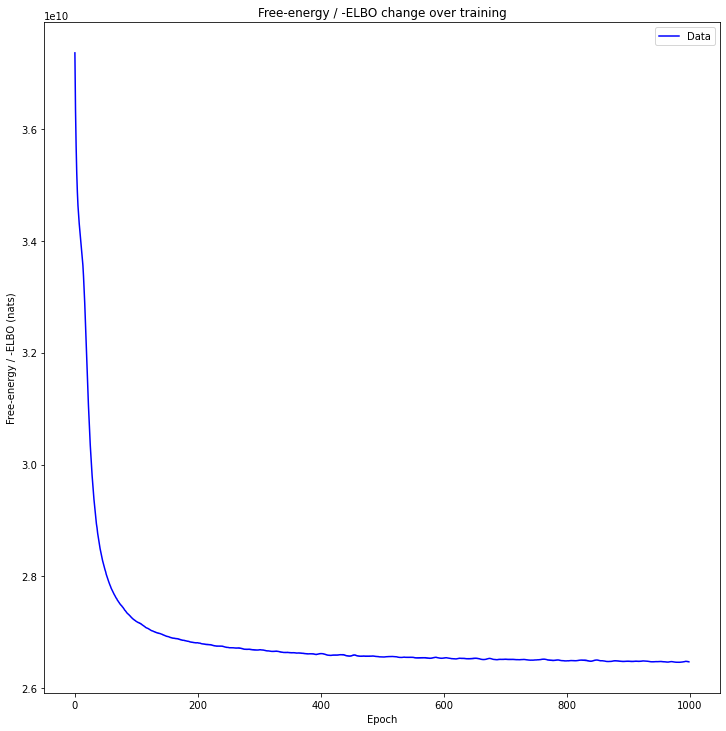

In [14]:
utils.plot_losses(losses)

In [15]:
len(dtfa.subjects())

6

In [16]:
def task_labeler(task):
    if 'Heights' in task:
        return 'Heights'
    elif 'Social' in task:
        return 'Social threat'
    elif 'Spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/zulqarnain/Code/ntfa_methods_rewrited_batching/htfatorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


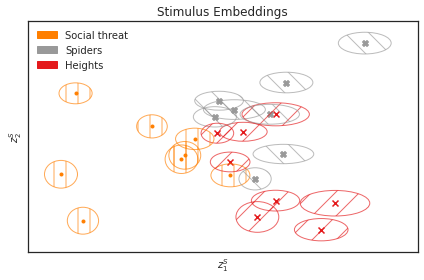

In [17]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='avfp_norest_task_embedding.pdf')

In [18]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/zulqarnain/Code/ntfa_methods_rewrited_batching/htfatorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


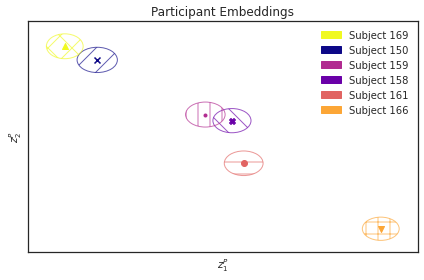

In [19]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [20]:
def block_task_labeler(b):
    task = b['task']
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

10/25/2021 20:03:22 Plotting factors for Participant 169, run 1


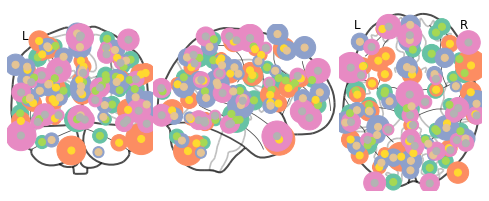

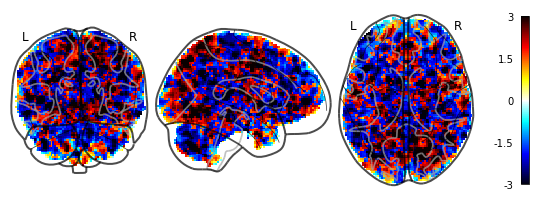

10/25/2021 20:03:30 Reconstruction Error (Frobenius Norm): 4.47802155e+02 out of 4.37333679e+02


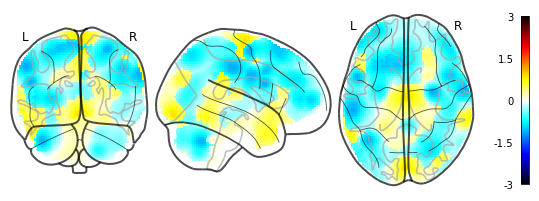

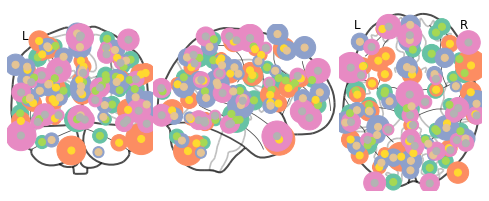

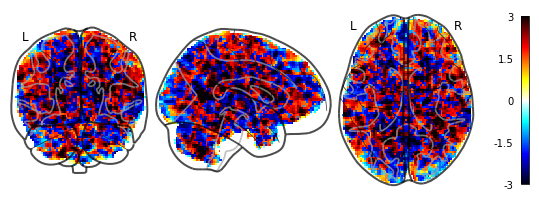

10/25/2021 20:03:41 Reconstruction Error (Frobenius Norm): 4.57656128e+02 out of 4.13657440e+02


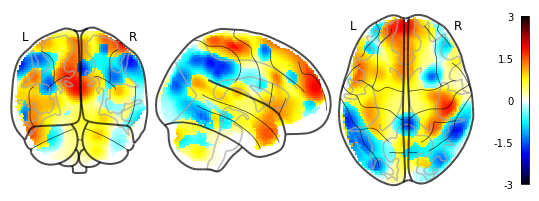

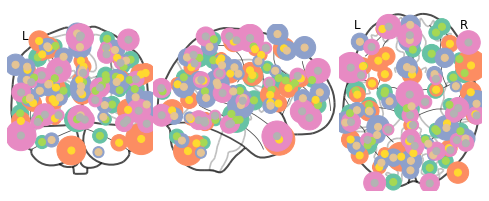

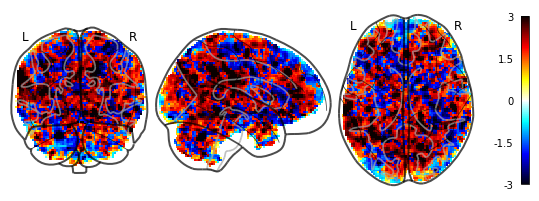

10/25/2021 20:03:52 Reconstruction Error (Frobenius Norm): 4.81865204e+02 out of 4.22085144e+02


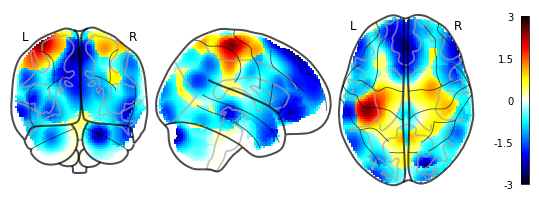

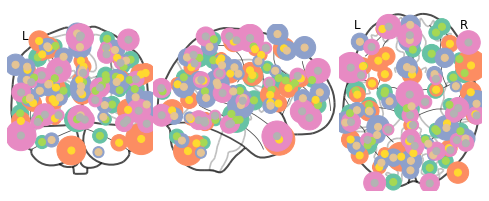

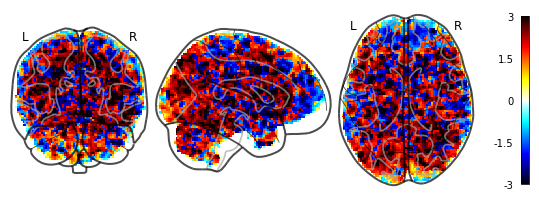

10/25/2021 20:04:03 Reconstruction Error (Frobenius Norm): 5.08173920e+02 out of 4.16741150e+02


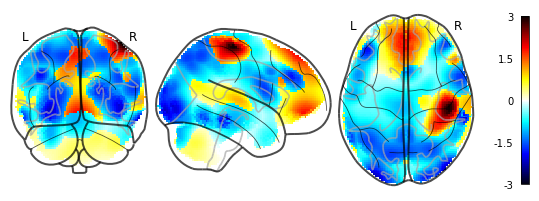

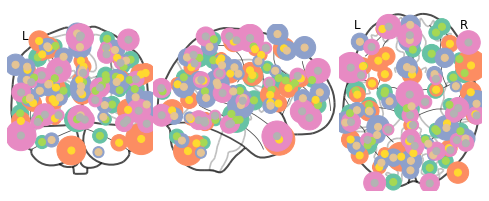

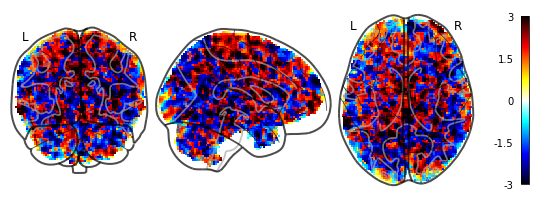

10/25/2021 20:04:16 Reconstruction Error (Frobenius Norm): 4.50125671e+02 out of 4.17382141e+02


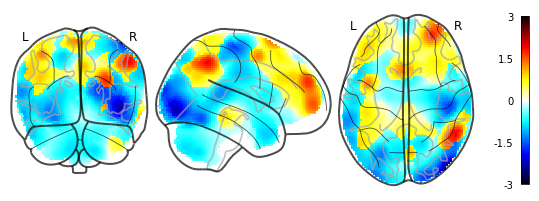

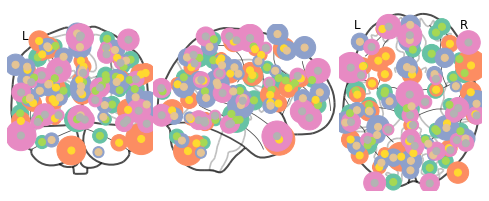

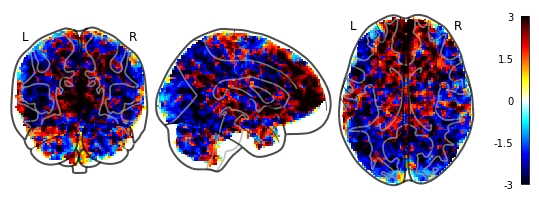

10/25/2021 20:04:29 Reconstruction Error (Frobenius Norm): 5.32664185e+02 out of 4.69324371e+02


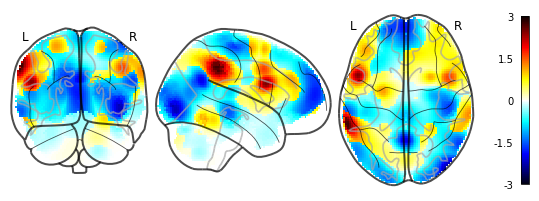

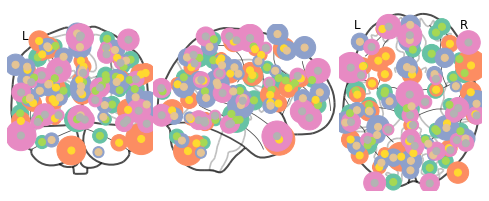

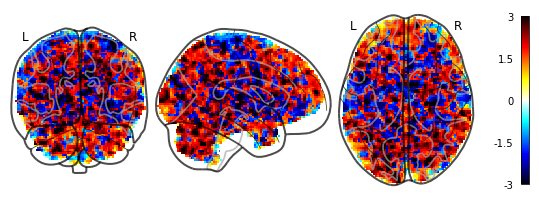

10/25/2021 20:04:43 Reconstruction Error (Frobenius Norm): 4.89595490e+02 out of 3.97955963e+02


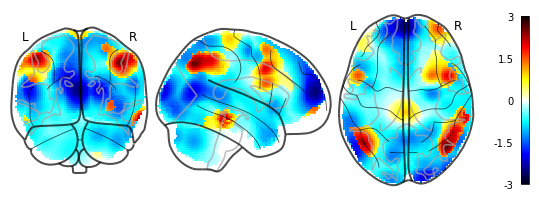

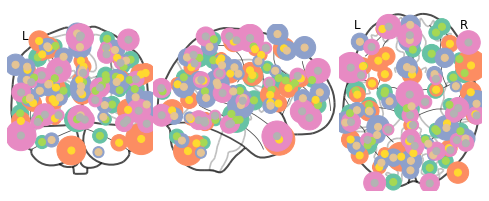

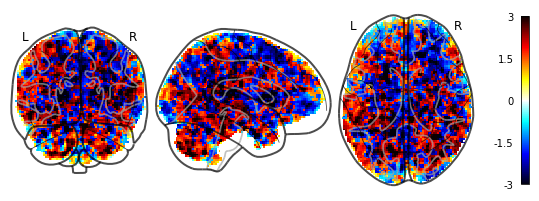

10/25/2021 20:05:00 Reconstruction Error (Frobenius Norm): 4.60768250e+02 out of 4.01981628e+02


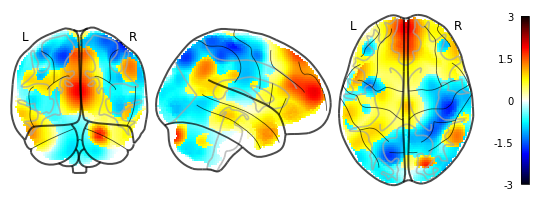

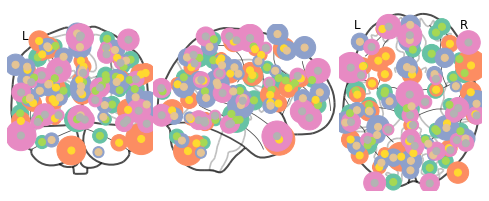

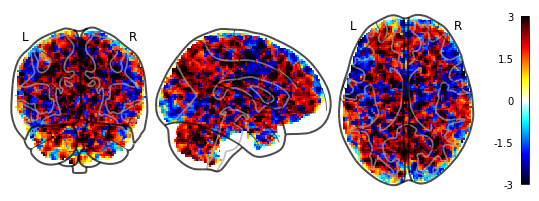

10/25/2021 20:05:16 Reconstruction Error (Frobenius Norm): 4.76179260e+02 out of 4.30525665e+02


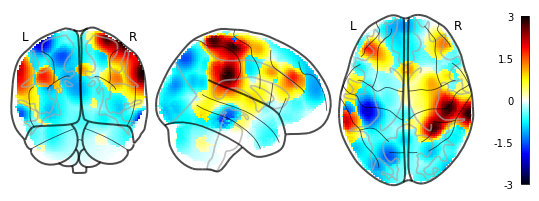

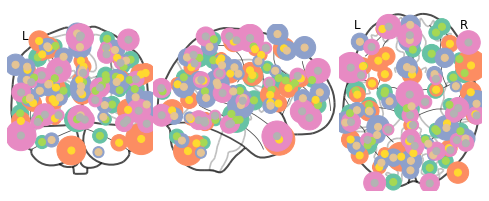

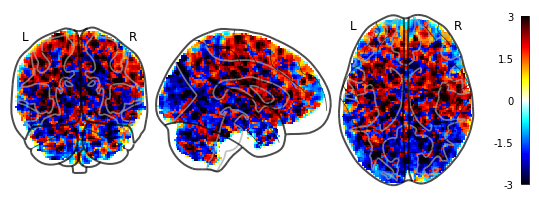

10/25/2021 20:05:33 Reconstruction Error (Frobenius Norm): 4.88591064e+02 out of 4.15524780e+02


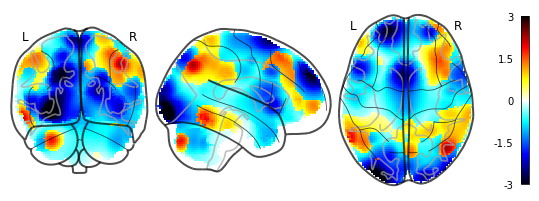

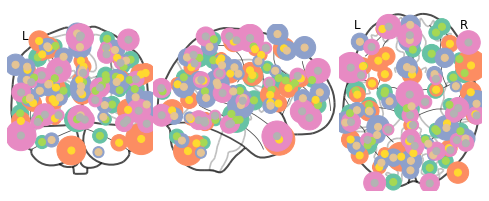

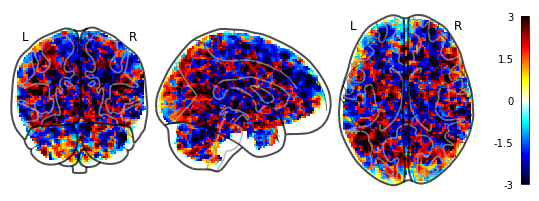

10/25/2021 20:05:50 Reconstruction Error (Frobenius Norm): 4.68931671e+02 out of 4.10976227e+02


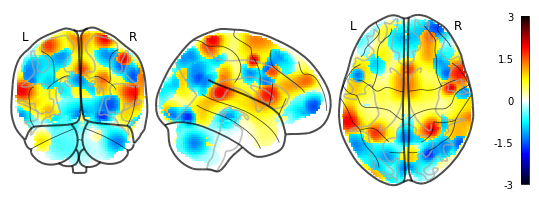

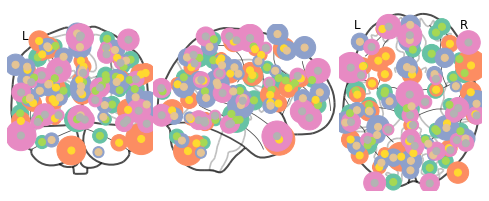

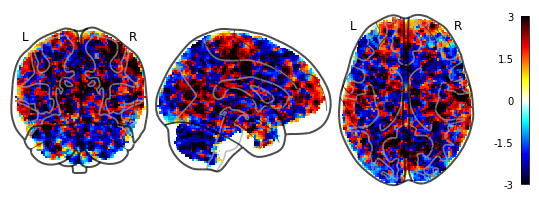

10/25/2021 20:06:08 Reconstruction Error (Frobenius Norm): 5.04763397e+02 out of 4.35158875e+02


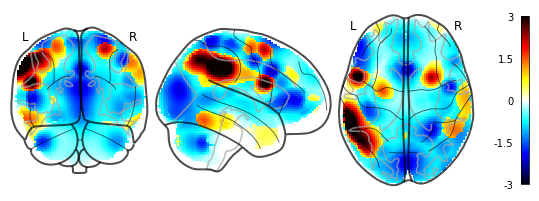

In [21]:
subject_runs = affvids_db.subject_runs()

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in affvids_db.blocks.values() if block['subject'] == subject and block['run'] == run]
    blocks.sort(key=lambda b: b['times'][0])
    for block in blocks:
        index = block['id']
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

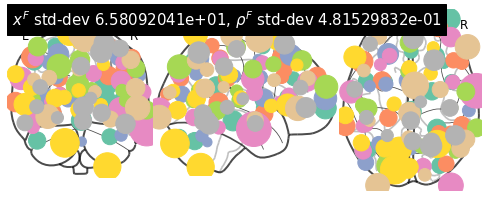

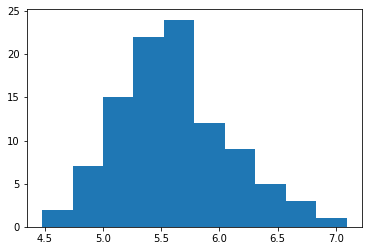

(<nilearn.plotting.displays.OrthoProjector at 0x7fca37195c10>,
 tensor([[  28.3852,  -46.2186,   21.0507],
         [  26.7142,   30.1303,    8.5562],
         [ -46.0171,    4.3436,   -1.7307],
         [ -45.2991,  -68.7453,  -36.7934],
         [ -26.2607,    2.9578,   62.9356],
         [ -48.4986,  -69.7120,   46.7518],
         [  35.8416,   22.6298,    1.3670],
         [  31.2663,  -85.0347,  -32.8069],
         [  43.9883,    2.7549,    6.3962],
         [   1.2198,   35.0631,   28.8650],
         [  23.0919,   -7.0255,   29.6995],
         [  41.3605,   68.8204,   -2.0208],
         [   1.2962,  -28.2772,  -15.4950],
         [ -20.7442,  -97.8883,   12.6760],
         [ -22.6661,  -34.8897,   29.0934],
         [  30.2392,  -50.6034,   63.6653],
         [  42.2718,  -49.5402,   -2.9014],
         [ -68.0000,  -43.4093,    3.6708],
         [ -29.2433,    4.1475,   -8.3326],
         [  54.5428,  -42.1129,   50.4378],
         [  38.1107,  -83.3585,   29.1695],
         [ -5

In [22]:
dtfa.visualize_factor_embedding()

In [23]:
self = dtfa
hyperparams = self.variational.hyperparams.state_vardict()
tasks = self.tasks()
subjects = self.subjects()
z_p_mu = hyperparams['subject_weight']['mu'].data
z_s_mu = hyperparams['task']['mu'].data
interactions = OrderedSet(list(itertools.product(subjects, tasks)))
z_ps_mu = np.zeros(shape=(len(interactions),2))
count = 0
for p in range (len(subjects)):
    for t in range(len(tasks)):
        joint_embed = torch.cat((z_p_mu[p], z_s_mu[t]), dim=-1)
        interaction_embed = self.decoder.interaction_embedding(joint_embed)# + \
#         self.decoder.interaction_embedding_skip(joint_embed)
        z_ps_mu[count,:] = interaction_embed.data.numpy()
#             interaction_embed = self.decoder.interaction_embedding(
#                 joint_embed).data
#             z_ps_mu[count,:] = self.decoder.interaction_embedding_out(torch.cat((interaction_embed,
#                                                                                  joint_embed),dim=-1)).data.numpy()
        count += 1
embedding_name = 'z^{PS}'

In [24]:
z_ps_mu

array([[ 8.22472990e-01,  6.73419714e-01],
       [ 6.61668897e-01,  6.15073085e-01],
       [-1.54108554e-01, -2.89107952e-02],
       [-4.83912677e-01, -2.67850131e-01],
       [-9.41122696e-02, -6.57417551e-02],
       [-4.21098201e-03,  2.75035389e-02],
       [ 3.35807890e-01,  3.39207292e-01],
       [ 1.67342573e-01,  2.50399530e-01],
       [-1.27127767e-01,  9.40714851e-02],
       [ 4.97061431e-01,  7.23099411e-01],
       [-1.23903170e-01,  5.63818216e-03],
       [ 1.94609702e-01,  1.55430049e-01],
       [-2.89571255e-01, -1.24878950e-01],
       [-4.55816895e-01,  1.36120409e-01],
       [-9.70921218e-02, -6.07704744e-02],
       [-1.01729156e-02,  6.49628043e-02],
       [ 3.86666119e-01,  3.52264732e-01],
       [ 2.37615362e-01,  2.47474805e-01],
       [ 5.65279901e-01,  4.93247569e-01],
       [ 1.27087027e-01,  4.14689332e-01],
       [ 1.43325314e-01,  2.21919462e-01],
       [ 2.39222124e-02,  1.05389923e-01],
       [ 6.18867815e-01,  4.87496614e-01],
       [-2.

In [25]:
import pickle
filename = PREFIX +  '.dat'
tensors = {
    'z': {'mu': z_ps_mu},
    'labels': list(interactions),
}
filename = open(filename,'wb')
pickle.dump(tensors, filename)
filename.close()

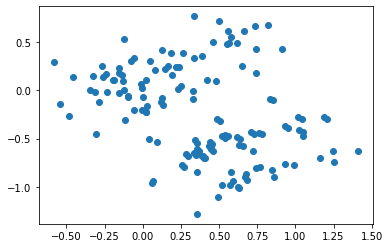

In [26]:
import matplotlib.pyplot as plt
plt.scatter(z_ps_mu[:,0], z_ps_mu[:,1])